In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import sklearn, pickle
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif,f_classif

# Dataset description

In [2]:
churn = pd.read_csv('Telecom_churn_dataset/churn_dataset.csv')
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
print("Percentage of values per feature:\n")
counts = churn.count()
for col,t in zip(counts.index,counts):
    perc = (t/len(churn))*100
    print(col,': ',round(perc,2),'%')

Percentage of values per feature:

state :  100.0 %
account length :  100.0 %
area code :  100.0 %
phone number :  100.0 %
international plan :  100.0 %
voice mail plan :  100.0 %
number vmail messages :  100.0 %
total day minutes :  100.0 %
total day calls :  100.0 %
total day charge :  100.0 %
total eve minutes :  100.0 %
total eve calls :  100.0 %
total eve charge :  100.0 %
total night minutes :  100.0 %
total night calls :  100.0 %
total night charge :  100.0 %
total intl minutes :  100.0 %
total intl calls :  100.0 %
total intl charge :  100.0 %
customer service calls :  100.0 %
churn :  100.0 %


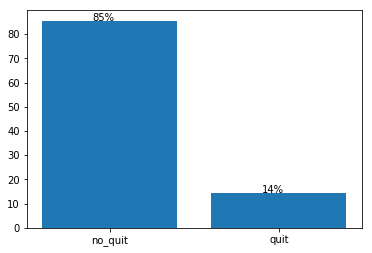

In [6]:
no_quit = churn[churn['churn']==False]

perc_no_quit = (len(no_quit)/len(churn))*100
perc_quit = ((len(churn)-len(no_quit))/len(churn)) *100

plot = plt.bar(x=['no_quit','quit'],height=[perc_no_quit,perc_quit])

for i in plot.patches:
    plt.text(x =i.get_x()+0.3,y=i.get_height(),s = "{}{}".format(int(i.get_height()),'%'))

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number vmail messages,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day minutes,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day calls,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total day charge,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve minutes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total eve charge,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total night minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.999999,NaN,NaN,NaN,NaN,NaN


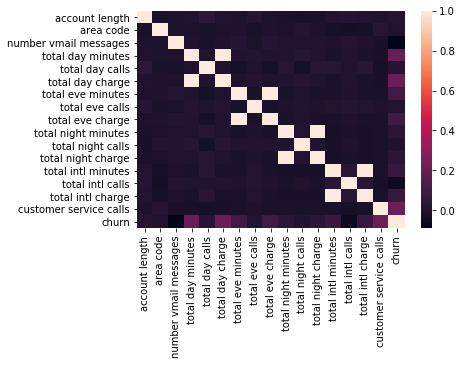

In [7]:
corr_m = churn.corr()
sns.heatmap(corr_m)
corr_m[corr_m>0.8]

# Dataset preprocessing

In [8]:
print('state unique values',len(np.unique(churn.state.values)))

print('phone number unique values',len(np.unique(churn['phone number'].values)))
churn = churn.drop(columns=['phone number'])

state unique values 51
phone number unique values 3333


In [9]:
# Create correlation matrix
corr_matrix = churn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

churn.drop(columns=to_drop,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(np.unique(churn.state.values))

churn['state'] = le.transform(churn['state'])
churn.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

churn['international plan'] = lb.fit_transform(churn['international plan'])
churn['voice mail plan'] = lb.fit_transform(churn['voice mail plan'])

churn.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
state                     3333 non-null int32
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
customer service calls    3333 non-null int64
churn                     3333 non-null bool
dtypes: bool(1), float64(4), int32(3), int64(8)
memory usage: 354.9 KB


In [ ]:
#churn['international plan'].astype('bool')

In [13]:
X = np.array(churn.drop(columns=['churn']))
X = preprocessing.scale(X)

y = np.array(churn['churn'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

14.045618247298918


<BarContainer object of 2 artists>

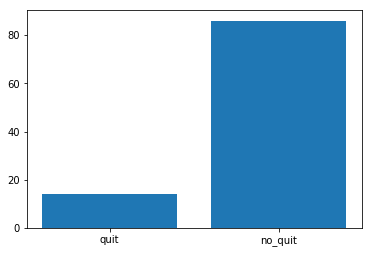

In [105]:
np.count_nonzero(y_train)
perc_quit = (np.count_nonzero(y_train)/len(y_train))*100
print((np.count_nonzero(y_train)/len(y_train))*100)


plt.bar(x=['quit','no_quit'],height=[perc_quit,100-perc_quit],)


15.827338129496402


<BarContainer object of 2 artists>

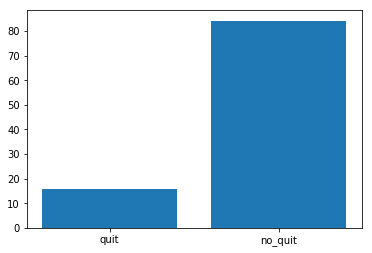

In [106]:
np.count_nonzero(y_test)
perc_quit = (np.count_nonzero(y_test)/len(y_test))*100
print((np.count_nonzero(y_test)/len(y_test))*100)


plt.bar(x=['quit','no_quit'],height=[perc_quit,100-perc_quit],)


In [14]:
from sklearn.experimental import enable_hist_gradient_boosting 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from matplotlib.pylab import rcParams
from sklearn import tree

import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [19]:
names = ['knc','svc','dtc','rfc','mlpc','abc','gnb','qda','sgdc','bc','etc']

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    #GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(n_estimators=10)
    #GradientBoostingClassifier(),
    #HistGradientBoostingClassifier()
]

parameters = [
    {'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute'),'leaf_size':range(10,51)},
    {'kernel':('linear','poly','rbf','sigmoid'),'degree':range(1,6),'decision_function_shape':('ovo','ovr')},
    {'criterion':('gini','entropy'),'splitter':('best','random'),'max_depth':range(1,10),'min_samples_split':range(2,10),\
              'min_samples_leaf':range(1,10)},
    {'criterion':('gini','entropy'),'max_depth':range(1,10),'min_samples_split':range(2,10),\
              'min_samples_leaf':range(1,10)},
    {'activation':('identity','logistic','tanh','relu'),'solver':('lbfgs','sgd','adam'),\
              'learning_rate':('constant','invscaling','adaptive')},
    {'n_estimators':range(40,60),'algorithm':('SAMME','SAMME.R'),'learning_rate':np.arange(0.1,1.1,0.1)},
    {'var_smoothing': np.arange(1e-9,10e-7,1e-8)},
    {'store_covariance':(True,False),'tol': np.arange(1e-4,1.0,1e-4)},
    {'loss':('hinge','log','modified_huber','squared_hinge','perceptron','squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'),\
             'penalty':('none','l2','l1','elasticnet'),'fit_intercept':(True,False),'shuffle':(True,False)},
    {'n_estimators':range(5,15),'bootstrap_features':(True,False),'oob_score':(True,False)},
    {'criterion':('gini','entropy'),'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
    #{'loss':('deviance','exponential'),'learning_rate':np.arange(0.1,1.1,0.1),'criterion':('friedman_mse','mse','mae'),'max_features':('auto','sqrt','log2')},
    #{'loss':('auto','binary_crossentropy','categorical_crossentropy'),'learning_rate':np.arange(0.1,1.1,0.1)}
]

best_estimators = []
all_data = []

for clf,param,name in zip(classifiers,parameters,names):
    #print(clf,param)
    clf = GridSearchCV(clf,param,cv=5,verbose=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    best_estimators.append((name,clf.best_estimator_))
    all_data.append(clf)
    print(name, clf.best_score_)


Fitting 5 folds for each of 246 candidates, totalling 1230 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 1230 out of 1230 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


knc 0.8823567134268536
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:    6.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.1s finished


svc 0.9127687374749499
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 8140 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:   29.0s finished


dtc 0.9435759519038076
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 6060 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   58.2s finished


rfc 0.9315687374749497
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   48.1s finished
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mlpc 0.9339799599198397
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.8min finished


abc 0.8815503006012024
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


gnb 0.854339879759519
Fitting 5 folds for each of 19998 candidates, totalling 99990 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 8460 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 24460 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 46860 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 75660 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 99990 out of 99990 | elapsed:  1.5min finished


qda 0.8723511022044088
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


sgdc 0.8679486973947895
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.6s finished
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


bc 0.9519791583166333
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 6320 tasks      | elapsed:   41.7s


etc 0.8803535070140279


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   42.7s finished


0.8823567134268536 KNeighborsClassifier
0.9127687374749499 SVC
0.9435759519038076 DecisionTreeClassifier
0.9315687374749497 RandomForestClassifier
0.9339799599198397 MLPClassifier
0.8815503006012024 AdaBoostClassifier
0.854339879759519 GaussianNB
0.8723511022044088 QuadraticDiscriminantAnalysis
0.8679486973947895 SGDClassifier
0.9519791583166333 BaggingClassifier
0.8803535070140279 ExtraTreesClassifier


,Name,Score
6,GaussianNB,85.433988
8,SGDClassifier,86.794870
7,QuadraticDiscriminantAnalysis,87.235110
10,ExtraTreesClassifier,88.035351
5,AdaBoostClassifier,88.155030
0,KNeighborsClassifier,88.235671
1,SVC,91.276874
3,RandomForestClassifier,93.156874
4,MLPClassifier,93.397996
2,DecisionTreeClassifier,94.357595


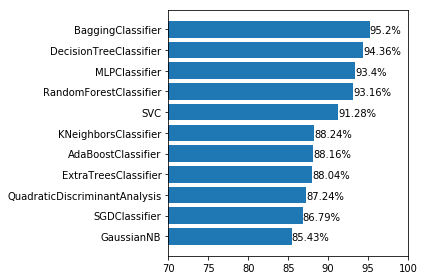

In [76]:
scores = []
names = []

for clf in all_data:
    print(clf.best_score_,str(clf.best_estimator_).split('(')[0])
    scores.append(clf.best_score_)
    names.append(str(clf.best_estimator_).split('(')[0])

best_estimators = pd.DataFrame()
best_estimators['Name']=names
best_estimators['Score']=pd.Series(scores) *100
best_estimators.sort_values(by='Score',inplace=True)

plot = plt.barh(y = np.arange(len(names)), width = best_estimators['Score'], tick_label = best_estimators['Name'])
plt.axis(xmin = 70.0)
plt.tight_layout()

for i in plot.patches:
    plt.text(y=i.get_y()+0.2,x=i.get_width(),s='{}%'.format(round(i.get_width(),2)))

best_estimators

In [77]:
type(all_data)
#print(all_data)

estimators = []

for data,name in zip(all_data,names):
    #print(data.best_score_)
    estimators.append((name,data.best_estimator_))
    '''if data.best_score_ >= 0.9:
        print(name, data.best_score_)
        estimators.append((name,data.best_estimator_))
        if name == 'BaggingClassifier':
            bc = data.best_estimator_
            #print('oob_score',bc.oob_score_)
            #print('estimators',bc.estimators_)'''
#print(estimators)
voting_clf = VotingClassifier(estimators)
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ppike\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.9088729016786571

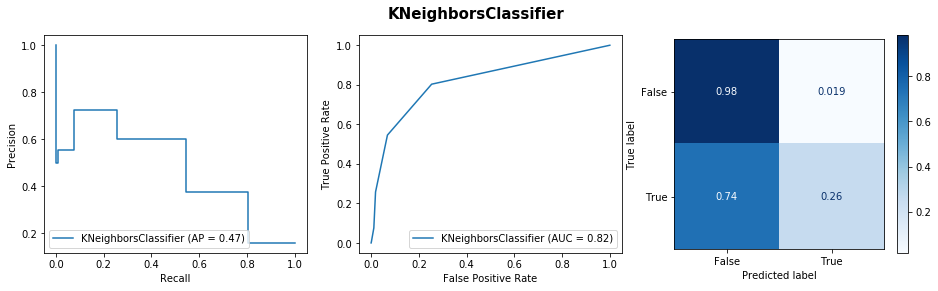

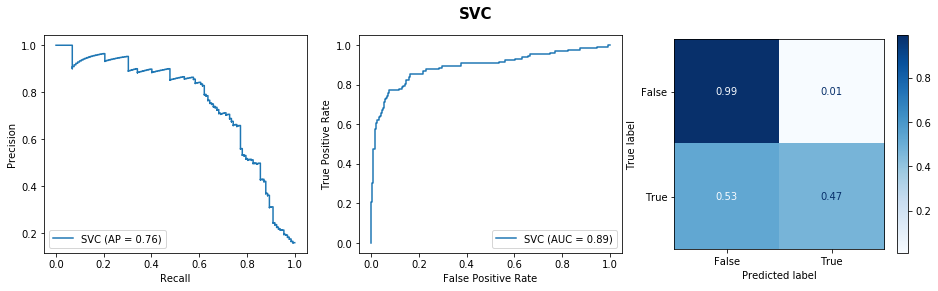

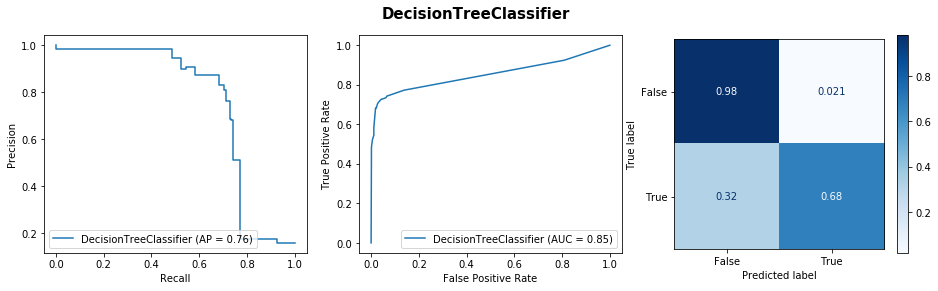

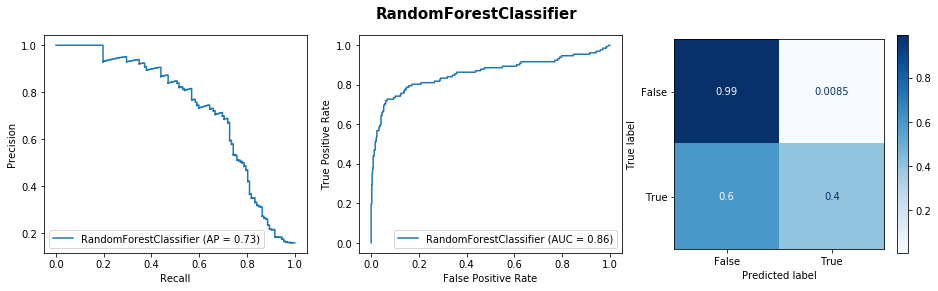

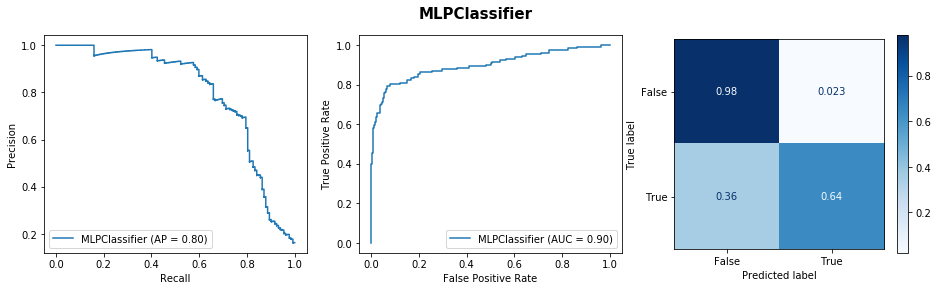

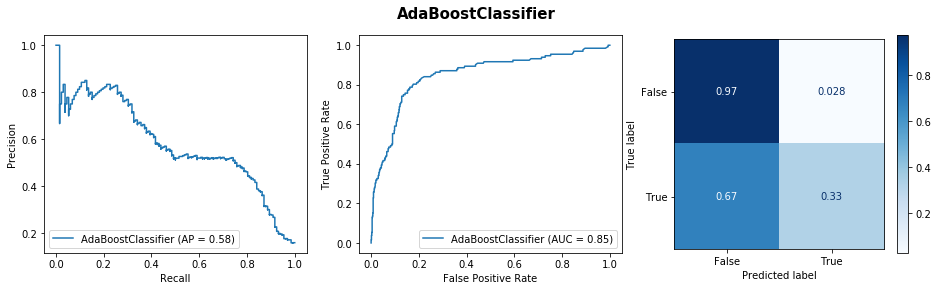

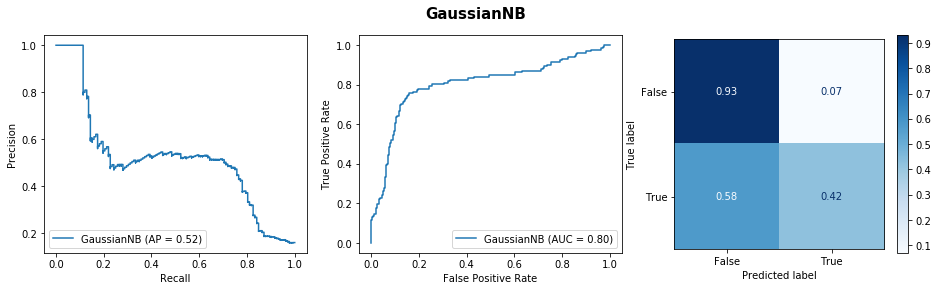

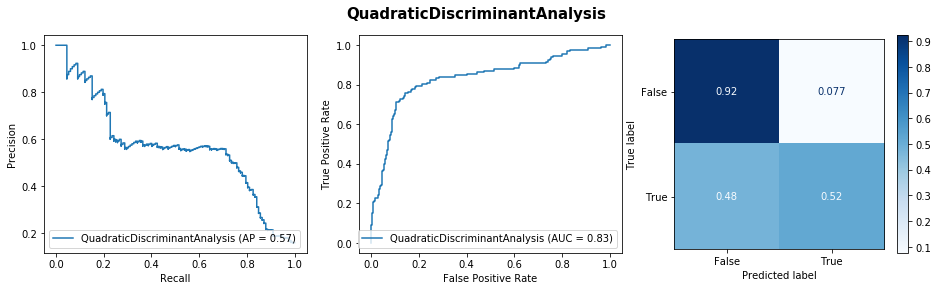

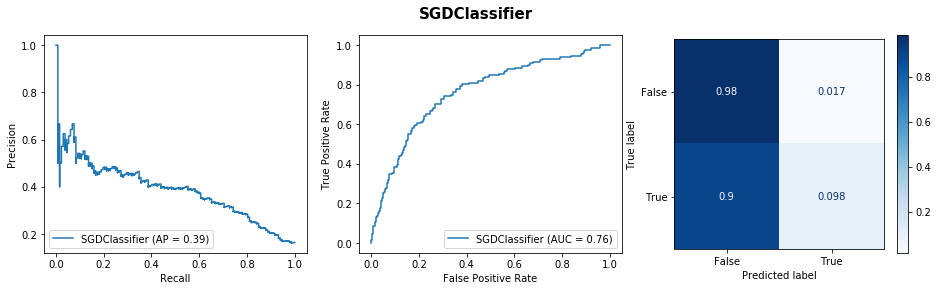

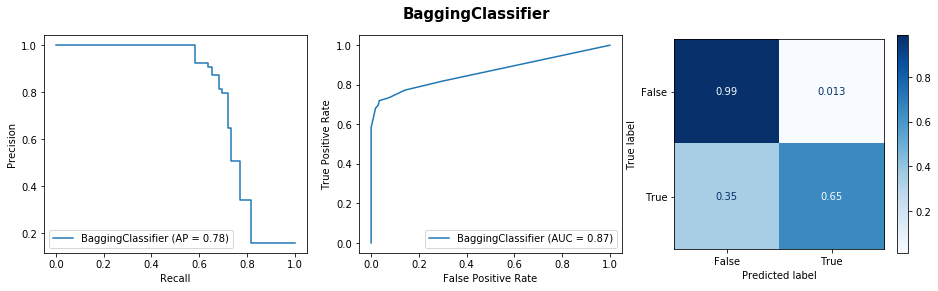

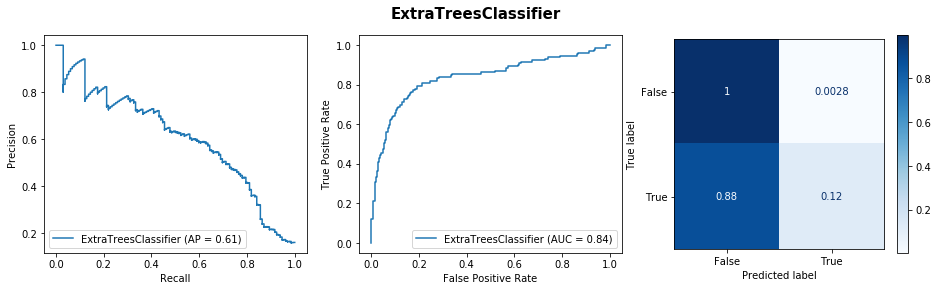

In [78]:
for clf in estimators:
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
    
    fig.suptitle(clf[0],fontsize=15,fontweight='bold')
    clf = clf[1]
    
    metrics.plot_precision_recall_curve(clf,X_test,y_test,ax=ax1)    
    metrics.plot_roc_curve(clf,X_test,y_test,ax=ax2)
    metrics.plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues,normalize='true',ax=ax3)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

names = ['dtc','rfc','etc']

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    ExtraTreesClassifier(n_estimators=10)]

parameters = [
    {'criterion':('gini','entropy'),'splitter':('best','random'),'max_depth':range(1,10),'min_samples_split':range(2,10),\
              'min_samples_leaf':range(1,10)},
    {'criterion':('gini','entropy'),'max_depth':range(1,10),'min_samples_split':range(2,10),\
              'min_samples_leaf':range(1,10)},
    {'criterion':('gini','entropy'),'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
]

best_trees_estimators = []

for clf,param,name in zip(classifiers,parameters,names):
    #print(clf,param)
    clf = GridSearchCV(clf,param,cv=5, verbose=1, n_jobs =-1)
    clf.fit(X_train,y_train)
    best_trees_estimators.append((name,clf.best_estimator_))
    print(name, clf.best_score_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 10764 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:   26.2s finished


dtc 0.9435759519038076
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 6060 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   58.3s finished


rfc 0.9291711422845692
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:   34.8s


etc 0.8839559118236473


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   37.6s finished


[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42.]
[ 0.9  3.9  6.9  9.9 12.9 15.9 18.9 21.9 24.9 27.9 30.9 33.9 36.9 39.9
 42.9]
[ 1.8  4.8  7.8 10.8 13.8 16.8 19.8 22.8 25.8 28.8 31.8 34.8 37.8 40.8
 43.8]


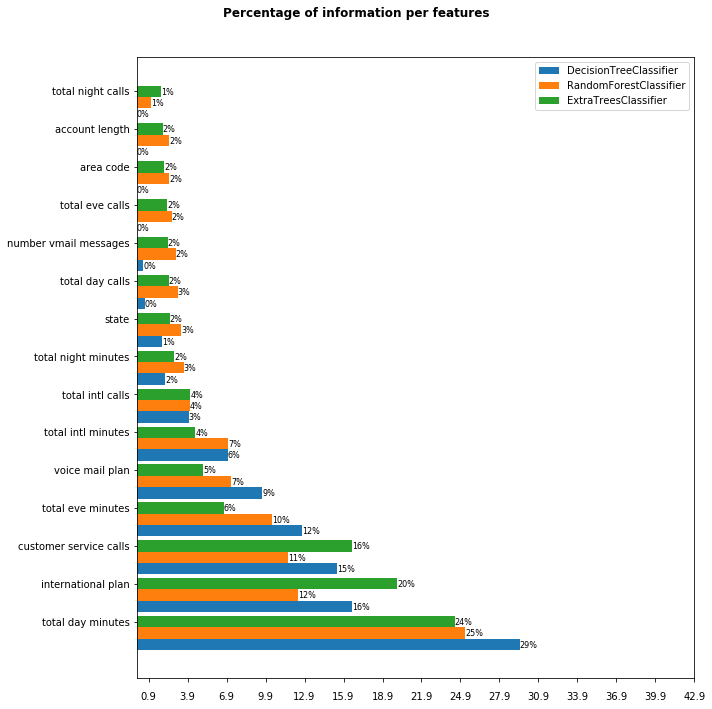

In [71]:
fig,axis = plt.subplots()
fig.suptitle('Percentage of information per features',fontweight='bold')

#churn.drop(columns=['churn'],inplace=True)

x = np.arange(len(churn.columns)*3,step =3)  # the label locations
height = 0.9  # the width of the bars
print(x)

names = []
n = 0 
axis.set_xticks(x)


for clf in best_trees_estimators:
    
    coord = x + n*width
    n = n+1
    print(coord)
    
    feature_importance = pd.DataFrame(index=churn.columns)
    name = str(clf[1]).split('(')[0]
    names.append(name)
    
    clf = clf[1]
    clf = clf.fit(X_train,y_train)
    
    '''print(len(churn.columns))
    print(churn.columns)
    print(len(clf.feature_importances_))'''
    
    feature_importance['Percentage']= clf.feature_importances_ * 100
    feature_importance.sort_values(by='Percentage',inplace=True,ascending=False)
    
    axis.barh(y = coord,tick_label=feature_importance.index,width=feature_importance['Percentage'],height=width,label=name)

    
for i in axis.patches:
    axis.text(x = i.get_width(),y = i.get_y()+0.2,s = "{}{}".format(int(i.get_width()),'%'),fontsize=8)
    

plt.xticks(x+width)
axis.legend()
axis.tick_params(axis='x', which='major', pad=10)
fig.set_size_inches(h=10,w=10)
plt.tight_layout(rect=[0, 0, 1,0.93])


In [91]:
km = KMeans(n_jobs=-1,n_clusters=2,max_iter=1000)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [92]:
predictions = km.predict(X_test)
metrics.accuracy_score(predictions,y_test)

0.3752997601918465

# Saving to pickle file

In [141]:
import datetime

date = datetime.datetime.now()
date = date.strftime('%Y-%m-%d_%H-%M')

pickle.dump(all_data,open('pickle_files/churn_all_data_'+date+'.pickle','wb'))
print('all_data was saved in pickle_files/churn_all_data_'+date+'.pickle')

pickle.dump(best_trees_estimators,open('pickle_files/churn_trees_estimators_'+date+'.pickle','wb'))
print('best_trees_estimators was saved in pickle_files/churn_trees_estimators_'+date+'.pickle')

all_data was saved in pickle_files/churn_all_data_2020-01-06_16-01.pickle
best_trees_estimators was saved in pickle_files/churn_trees_estimators_2020-01-06_16-01.pickle
